In [1]:
# William Ng
# EDA Assignment with Dataset

In [2]:
# Import Libraries needed for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = "twitchdata-update.csv"
df = pd.read_csv(data)

# Display relevant information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [3]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [4]:
df.head(100)

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
95,EsfandTV,888938940,189045,29597,4393,471970,216021,24144005,True,False,English
96,shroud,888505170,30240,471281,29612,7744066,833587,30621257,True,False,English
97,NOBRU,888211260,38655,132224,22070,1549722,1400039,6781403,True,False,Portuguese
98,buster,884353800,59295,97838,14195,1087377,1052053,37351933,True,False,Russian


In [5]:
df.isna().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

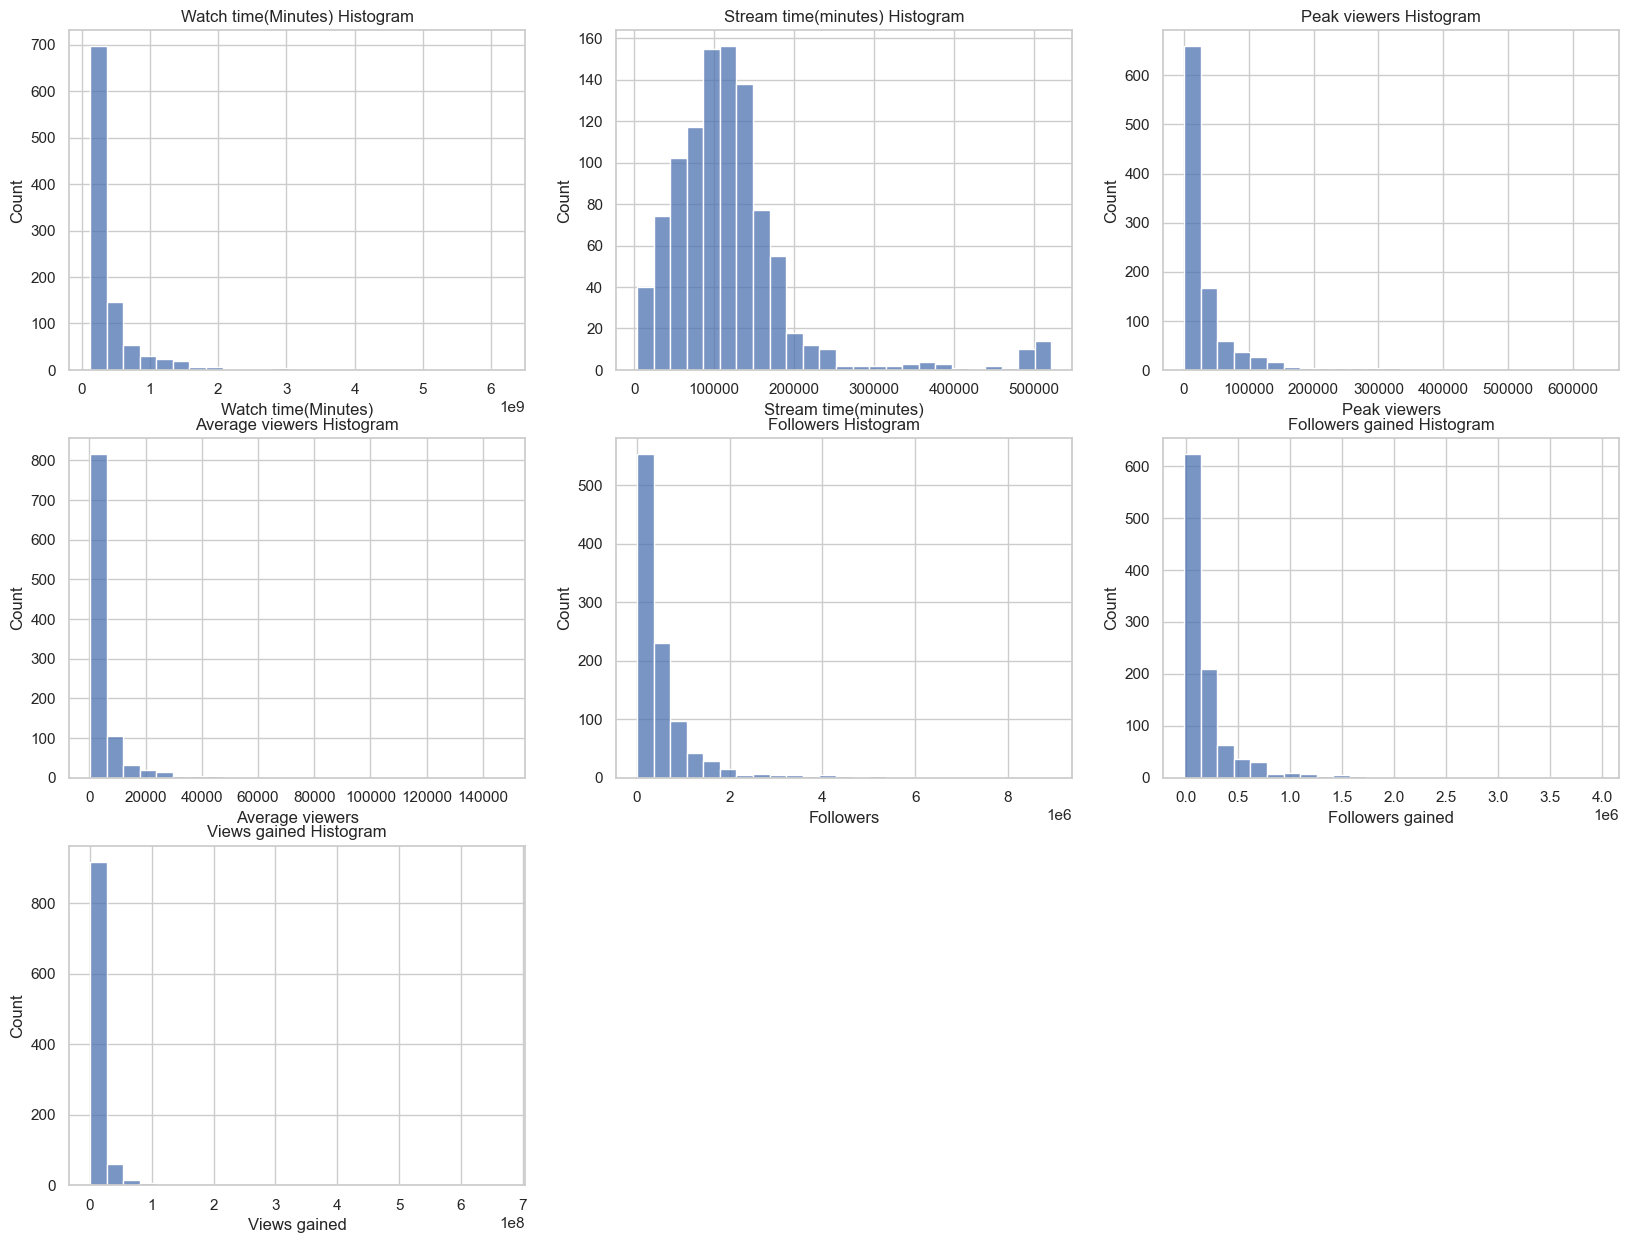

In [8]:
sns.set(style="whitegrid")

# Get numeric and categorical columns 
num_cols=df.select_dtypes(include=["int64"]).columns.tolist()
cat_cols=df.select_dtypes(include=["object", "bool"]).columns.tolist()
col_row = 3
num_rows = (len(num_cols) + col_row - 1) // col_row
fig, ax = plt.subplots(num_rows, col_row, figsize=(20, 5 * num_rows))
ax = ax.flatten()
Dataset = []

for col in num_cols:
    max = df[col].max()
    min = df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    quartile1 = df[col].quantile(0.25)
    quartile3 = df[col].quantile(0.75)
    IQR = quartile3 - quartile1
    lower = quartile1 - (1.5 * IQR)
    upper = quartile3 + (1.5 * IQR)
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    Dataset.append({
        "column": col,
        "max": max,
        "min": min,
        "mean": mean,
        "median": median,
        "std" : std
    })

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=ax[i], kde=False, bins=25)
    ax[i].set_title(f'{col} Histogram')

for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.show()

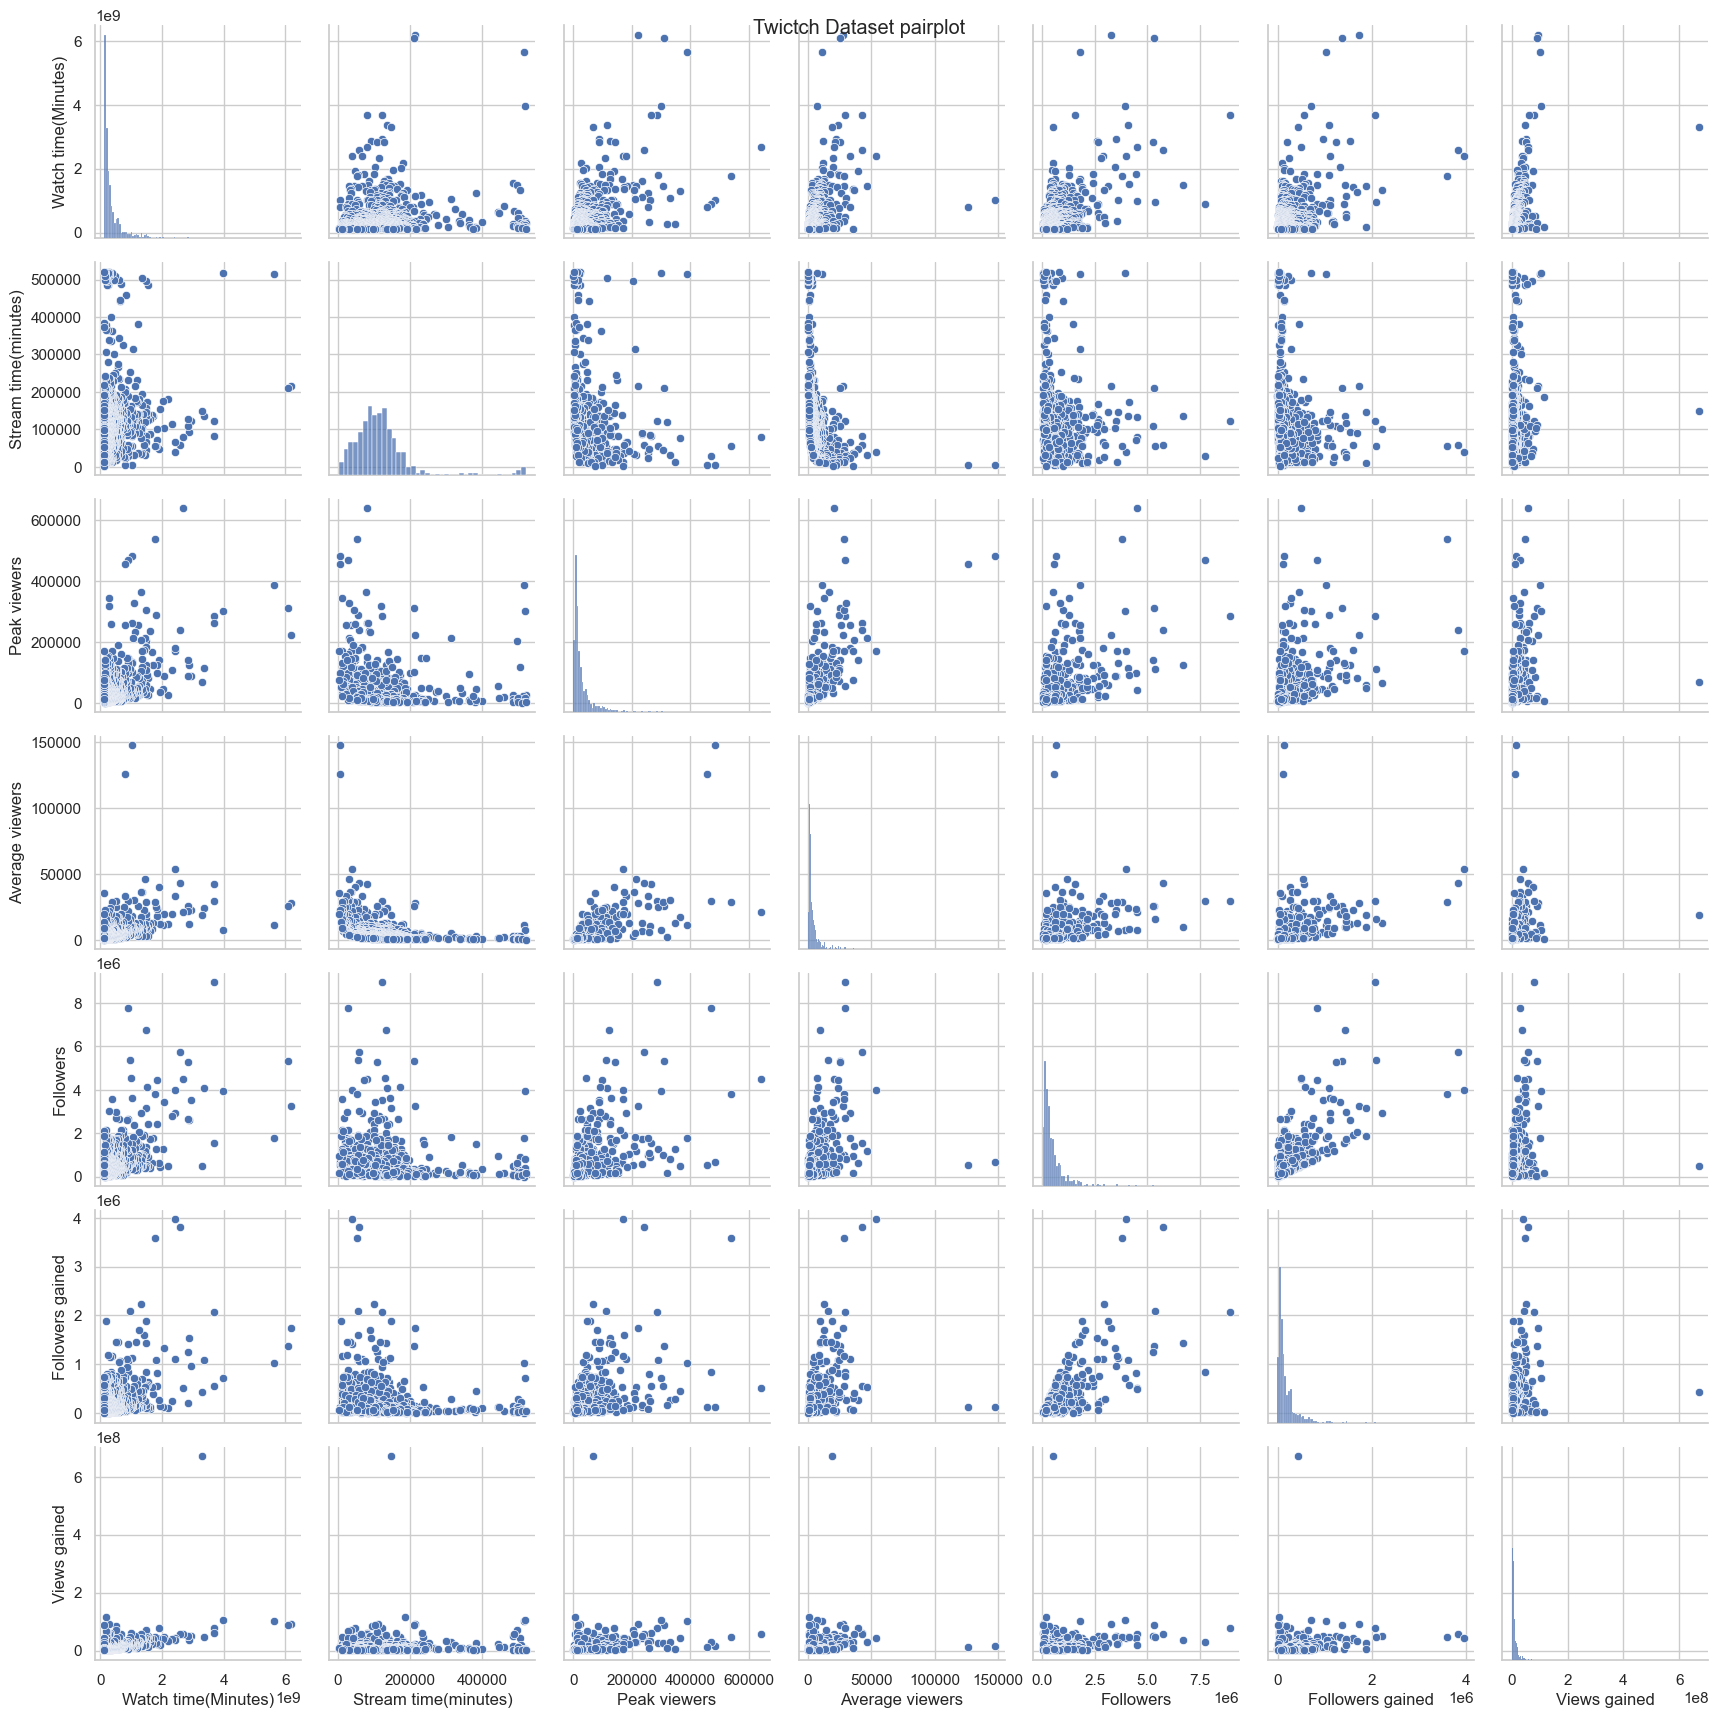

In [7]:
sns.pairplot(df[num_cols])
plt.suptitle("Twictch Dataset pairplot")
plt.show()

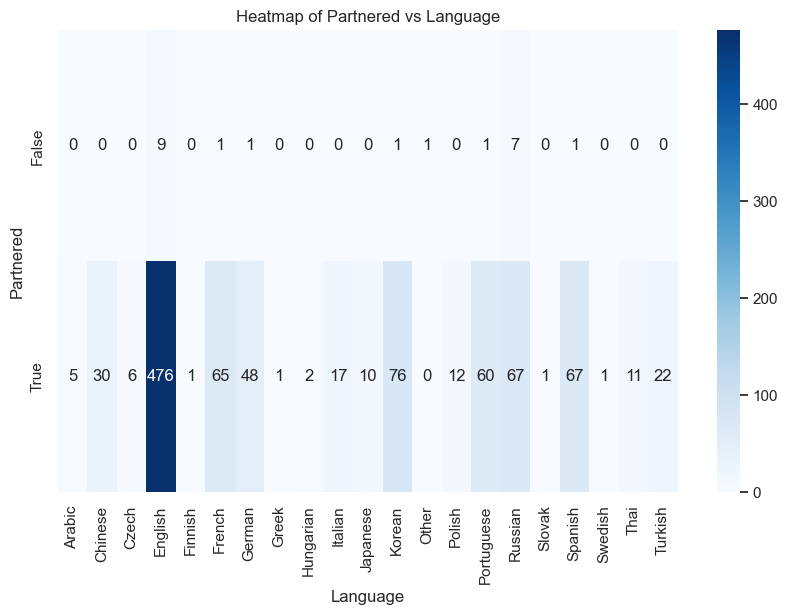

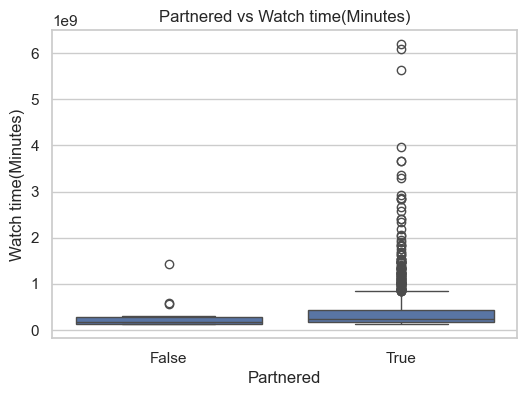

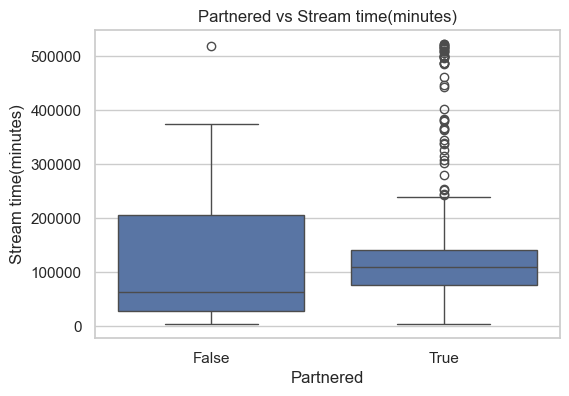

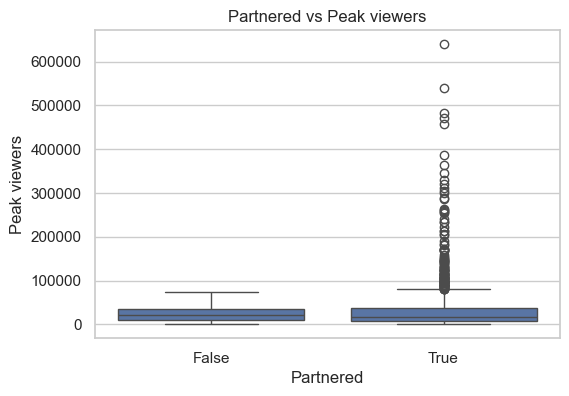

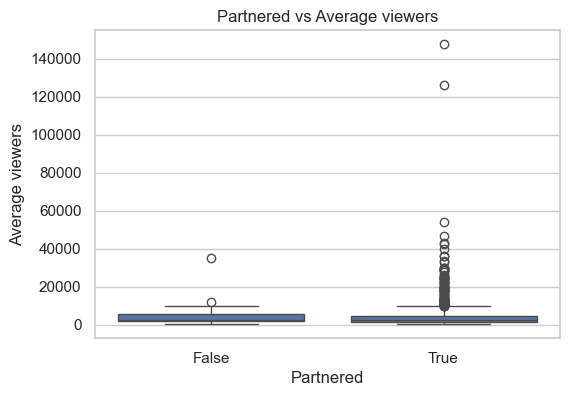

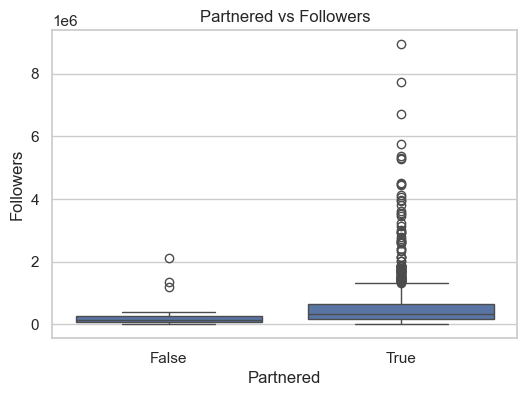

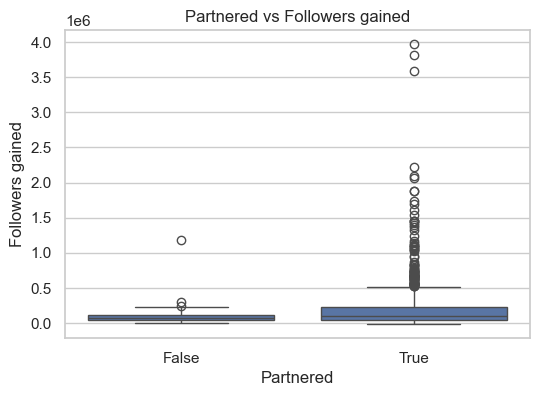

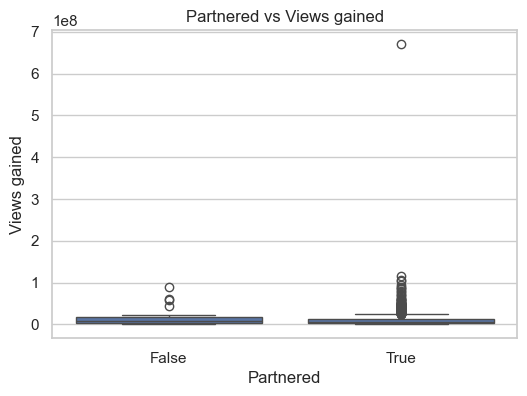

In [10]:
# Heatmap of Categorical vs Categorical Data
# Example using 'Partnered' and 'Language'
cross_tab = pd.crosstab(df['Partnered'], df['Language'])

# Plot heatmap for the cross-tabulation
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="Blues", fmt='d')
plt.title("Heatmap of Partnered vs Language")
plt.xlabel("Language")
plt.ylabel("Partnered")
plt.show()

# Box plots for Categorical vs Numerical Data
# Plot relationship between 'Partnered' and each numerical variable
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df['Partnered'], y=df[col])
    plt.title(f'Partnered vs {col}')
    plt.xlabel('Partnered')
    plt.ylabel(col)
    plt.show()